In [38]:
import numpy as np
from numpy import random as rd
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

ETF_ticker = ["252670", "122630", "233740", "251340", "114800", "069500", "102110", "225800", "138230", "132030", "280940", "292570", "292590", "292580"]
N = len(ETF_ticker)
equal_weight = [1/N for i in range(0,N)]
stocks_data = []
srt = "20140101"
end = "20191231"
for i in range(0, N):
    stocks_data.append(stock.get_market_ohlcv_by_date(srt, end, ETF_ticker[i])["종가"][-300:])
seq_length = len(stocks_data[0])

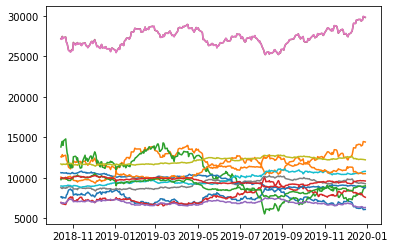

In [39]:
# 개별 자산의 가격 그래프
plt.figure('no rebalance / indiv asset')
for i in range(0,N):
    plt.plot(stocks_data[i])
plt.show()

In [40]:
#수익률 구하기
ret = pd.DataFrame(np.nan, index=np.arange(len(stocks_data[0])), columns=ETF_ticker)
for stock, idx in zip(ETF_ticker, range(0,N)):
    for d in range(1, seq_length):
        ret[stock].iloc[d] = stocks_data[idx][d]/stocks_data[idx][d-1]

In [41]:
#수익률 누적시키기
ret_cum = np.cumprod(ret)
ret

,252670,122630,233740,251340,114800,069500,102110,225800,138230,132030,280940,292570,292590,292580
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.004572,0.996033,1.031137,0.984241,1.002886,0.997313,0.998046,0.989779,0.994454,1.000556,0.997650,0.984158,1.013804,1.007545
2,0.975293,1.025090,1.019312,0.989083,0.985612,1.012991,1.011856,0.997705,0.997855,0.997224,1.002826,0.997485,1.006556,1.000000
3,1.017333,0.981352,0.964864,1.018396,1.009489,0.991074,0.991605,1.013226,1.007309,0.998330,0.998121,1.006556,0.990982,0.997004
4,0.991481,1.007918,1.041771,0.978324,0.996385,1.003933,1.003828,0.996595,0.997866,1.004462,0.997647,0.994489,1.004550,0.996495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.000801,0.998586,1.018738,0.990666,1.000000,0.999831,1.000677,1.004287,1.002852,1.000947,1.001114,1.009986,1.000000,1.004152
296,1.014412,0.986195,0.968731,1.016332,1.007800,0.993565,0.993569,1.002134,0.999594,1.007565,0.993882,1.001412,0.998327,0.996899
297,0.993686,1.008256,1.050633,0.974042,0.996130,1.004091,1.003236,0.995740,0.998374,1.008447,0.991046,0.988246,0.999441,1.000000
298,0.967434,1.031328,1.032530,0.982234,0.983683,1.014599,1.016299,1.000000,0.999593,1.003257,0.994353,1.000476,1.002236,1.001037


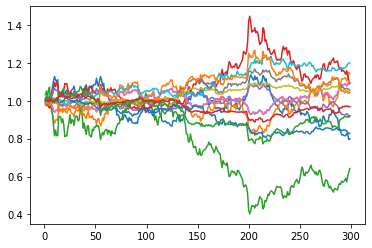

In [42]:
#개별 자산의 수익률
plt.figure('returns on indiv assets')
for i in ETF_ticker:
    plt.plot(ret_cum[i])
plt.show()

In [ ]:
#동일비중의 자산을 투자후 꾸준히 가지고 있었을 때
#Rn = n번째 자산의 누적수익률
#Return = w1R1 + w2R2 + w3R3 + ... + wnRn